# Page View Time Series Visualizer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Read CSV using Pandas

Formatting the index column to be the "date" column, and set the datatype of the "date" index column to be "datetime"

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col = 0, parse_dates = True)

df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


### Calculating the top 2.5% and bottom 2.5% value of the dataset

In [4]:
df['value'].quantile(0.975)

177613.075

In [5]:
df['value'].quantile(0.025)

17876.4

### Data filtering
Filtering the data so only the data with value between the top 2.5% and bottom 2.5% are used

In [6]:
df_filter = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

df_filter

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


### Displaying the data in line chart

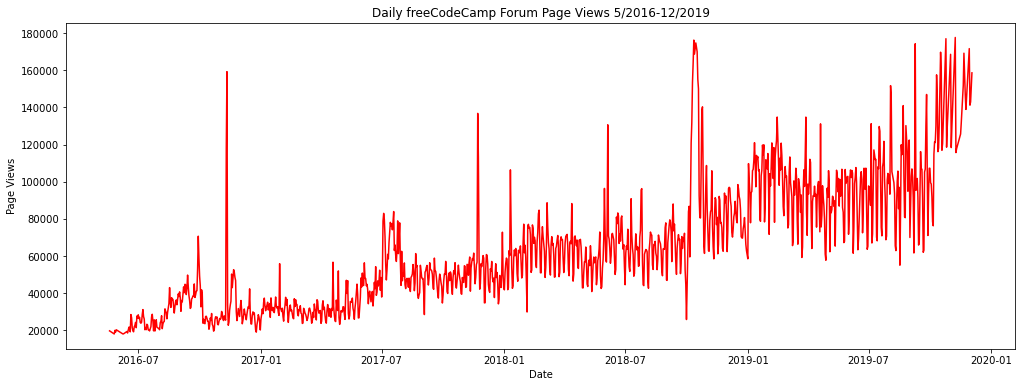

In [7]:
fig, ax = plt.subplots(figsize = (17,6))

ax.set_xlabel("Date")
ax.set_ylabel("Page Views")
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.plot(df_filter.index,df_filter['value'],'r-')

### Creating new columns that contain the value of month and year of each data
These new columns will be used for grouping the data

In [8]:
df_filter['month'] = df_filter.index.month
df_filter

,value,month
date,,
2016-05-19,19736,5
2016-05-26,18060,5
2016-05-27,19997,5
2016-05-28,19044,5
2016-05-29,20325,5
...,...,...
2019-11-24,138875,11
2019-11-29,171584,11
2019-11-30,141161,11


In [9]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1238 entries, 2016-05-19 to 2019-12-03
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1238 non-null   int64
 1   month   1238 non-null   int64
dtypes: int64(2)
memory usage: 29.0 KB


In [10]:
df_filter['year'] = df_filter.index.year
df_filter

,value,month,year
date,,,
2016-05-19,19736,5,2016
2016-05-26,18060,5,2016
2016-05-27,19997,5,2016
2016-05-28,19044,5,2016
2016-05-29,20325,5,2016
...,...,...,...
2019-11-24,138875,11,2019
2019-11-29,171584,11,2019
2019-11-30,141161,11,2019


In [11]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1238 entries, 2016-05-19 to 2019-12-03
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1238 non-null   int64
 1   month   1238 non-null   int64
 2   year    1238 non-null   int64
dtypes: int64(3)
memory usage: 38.7 KB


### Data grouping
Grouping the data by year, and calculating the average value (daily page views) for each month

In [12]:
df_bar = pd.DataFrame(df_filter.groupby(['year' ,'month'])['value'].mean())
df_bar = df_bar.unstack()
df_bar

value                                                           \
month             1              2             3             4             5    
year                                                                            
2016             NaN            NaN           NaN           NaN  19432.400000   
2017    32785.161290   31113.071429  29369.096774  30878.733333  34244.290323   
2018    58580.096774   65679.000000  62693.774194  62350.833333  56562.870968   
2019   102056.516129  105968.357143  91214.483871  89368.433333  91439.903226   

                                                                               \
month            6             7              8             9              10   
year                                                                            
2016   21875.105263  24109.678571   31049.193548  41476.866667   27398.322581   
2017   43577.500000  65806.838710   47712.451613  47376.800000   47438.709677   
2018   70117.000000  63591.064516   62831.612903  65941.733333  111378.142857   
2019   90435.642857  97236.566667  102717.310345  97268.833333  122802.272727   

                                     
month             11             12  
year                                 
2016    40448.633333   27832.419355  
2017    57701.566667   48420.580645  
2018    78688.333333   80047.483871  
2019   143166.428571  150733.500000

### Displaying the result in bar chart

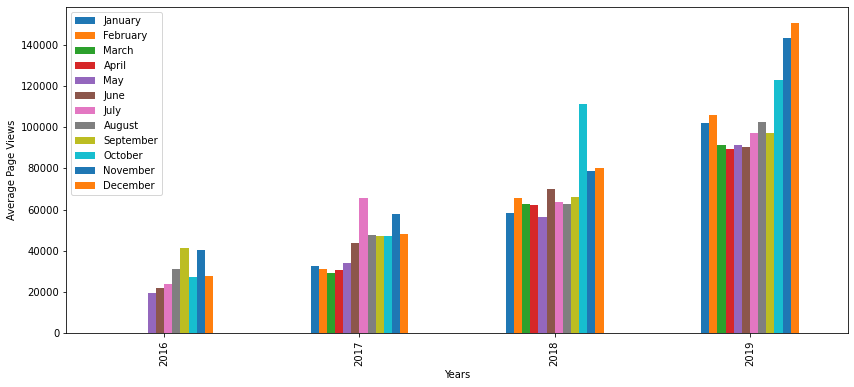

In [13]:
df_bar.plot(kind='bar', legend = True, figsize=(14,6))

plt.xlabel("Years")
plt.ylabel("Average Page Views")
plt.legend(labels =['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()

### Creating a new data frame
Creating a new dataframe and reset the index back to dataframe default.

In [14]:
df_box = df_filter.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

df_box

,date,value,month,year
0,2016-05-19,19736,May,2016
1,2016-05-26,18060,May,2016
2,2016-05-27,19997,May,2016
3,2016-05-28,19044,May,2016
4,2016-05-29,20325,May,2016
...,...,...,...,...
1233,2019-11-24,138875,Nov,2019
1234,2019-11-29,171584,Nov,2019
1235,2019-11-30,141161,Nov,2019
1236,2019-12-01,142918,Dec,2019


### Creating a new column that contains the integer value of 'month' column
This integer column is created so we can sort the data by month's value (the 'month' column can't be used because the datatype is 'object'). Sorting the data by 'month' column will sort the data by month's alphabetical order

In [15]:
df_box['month_num'] = df_box['date'].dt.month
df_box = df_box.sort_values('month_num')
df_box

,date,value,month,year,month_num
210,2017-01-06,37353,Jan,2017,1
937,2019-01-06,94108,Jan,2019,1
936,2019-01-05,77897,Jan,2019,1
935,2019-01-04,94514,Jan,2019,1
934,2019-01-03,100710,Jan,2019,1
...,...,...,...,...,...
567,2017-12-29,72819,Dec,2017,12
566,2017-12-28,51018,Dec,2017,12
565,2017-12-27,43075,Dec,2017,12
201,2016-12-28,28424,Dec,2016,12


In [16]:
df_box.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1238 entries, 210 to 1237
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1238 non-null   datetime64[ns]
 1   value      1238 non-null   int64         
 2   month      1238 non-null   object        
 3   year       1238 non-null   int64         
 4   month_num  1238 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 58.0+ KB


### Displaying the result in Seaborn's box plot
These box plots show how the values are distributed within a given year or month and how it compares over time. 

Text(0, 0.5, 'Page Views')

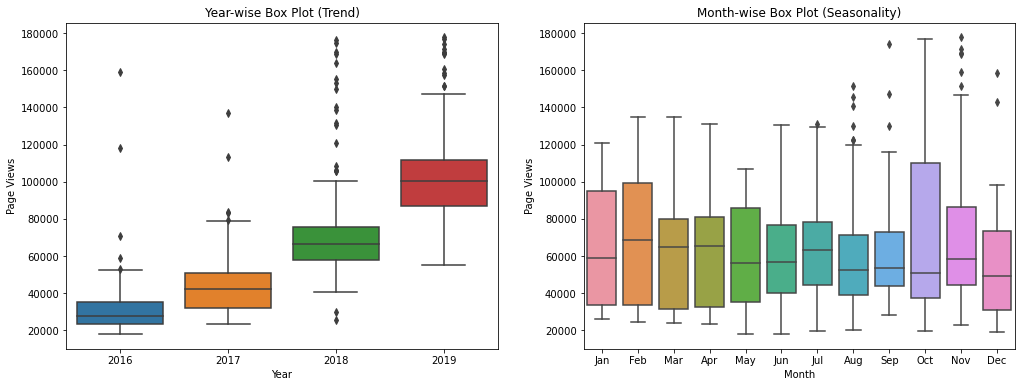

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (17,6))

axes[0] = sns.boxplot(x=df_box["year"], y=df_box["value"], ax = axes[0])
axes[1] = sns.boxplot(x=df_box["month"], y=df_box["value"], ax = axes[1])

axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')

axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')